# Problem 3, Parts F-H: Stochastic Gradient Descent with a Larger Dataset

Use this notebook to write your code for problem 3 parts F-H by filling in the sections marked `# TODO` and running all cells.

In [28]:
# Setup.

import numpy as np
from numpy.linalg import pinv
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 3F: Perform SGD with the new dataset

For the functions below, you may re-use your code from parts 3C-E. Note that you can now modify your SGD function to return the final weight vector instead of the weights after every epoch.

In [2]:
def loss(X, Y, w):
    '''
    Calculate the squared loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    
    #==============================================
    # TODO: Implement the SGD loss function.
    #==============================================
    
    return np.sum((Y - np.sum(w*X, axis=1))**2)


def gradient(x, y, w):
    '''
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        
    Output:
        The gradient of the loss with respect to x, y, and w. 
    '''
    
    #==============================================
    # TODO: Implement the gradient of the loss function.
    #==============================================    
    
    return -2 * (y - np.dot(w,x)) * x

def SGD(X, Y, w_start, eta, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    
    #==============================================
    # TODO: Implement the SGD algorithm.
    #==============================================    
    
    N = X.shape[0]
    D = X.shape[1]
    losses = np.zeros(N_epochs)
    w = w_start
  
    for epoch in range(N_epochs):
      for i in range(N):
        x = X[i,:]
        y = Y[i]
        w -= eta*gradient(x,y,w)
      losses[epoch] = loss(X,Y,w)
    
    return w, losses

Next, we need to load the dataset. In doing so, the following function may be helpful:

In [3]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: GeneratorExitiven as a string.
    
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

Now, load the dataset in `sgd_data.csv` and run SGD using the given parameters; print out the final weights.

In [11]:
#==============================================
# TODO:
# (1) load the dataset
# (2) run SGD using the given parameters
# (3) print out the final weights.
#==============================================

# The following should help you get started:
data = load_data('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/sets/set1/data/sgd_data.csv')
X = data.copy()
#replace the last column with 1s
Y = data[:,-1]
X[:,-1] = 1

In [14]:
w, losses = SGD(X, Y, [0.001,0.001,0.001,0.001,0.001], np.exp(-15), 800)
w

array([ -5.94229011,   3.94369494, -11.72402388,   8.78549375,
        -0.22720591])

## Problem 3G: Convergence of SGD

This problem examines the convergence of SGD for different learning rates. Please implement your code in the cell below:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This

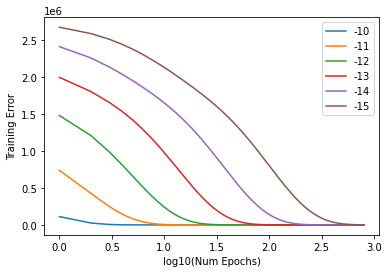

In [34]:
#==============================================
# TODO: create a plot showing the convergence
# of SGD for the different learning rates.
#==============================================
exps = np.arange(-10,-16,-1)
eta_list = np.exp(exps)
num_epochs = 800
epochs = np.arange(num_epochs)
for eta in eta_list:
  w, losses = SGD(X, Y, [0.001,0.001,0.001,0.001, 0.001], eta, num_epochs)
  plt.plot(np.log10(epochs), losses)
plt.legend(exps)
plt.xlabel('log10(Num Epochs)')
plt.ylabel('Training Error')
plt.savefig('fig3.pdf')

## Problem 3H

Provide your code for computing the least-squares analytical solution below.

In [33]:
#==============================================
# TODO: implement the least-squares
# analytical solution.
#==============================================
np.dot(pinv(X),Y)


array([ -5.99157048,   4.01509955, -11.93325972,   8.99061096,
        -0.31644251])